In [119]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot  as plt


In [88]:
data_dir = './data/'
df = pd.read_csv(data_dir + 'train.csv')
df.head()

,Unnamed: 0,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
0,0,"Sun, 28 Aug 2016 00:17:44 +0000",amazon,in,0,0,multipart/mixed,0,0,0,0,102,4,3
1,1,"Mon, 13 Jun 2016 07:17:24 +0000 (UTC)",linkedin,com,0,0,multipart/alternative,15,44,0,0,55,35444,1
2,2,"Tue, 21 Nov 2017 05:03:34 -0800 (PST)",quora,com,0,0,multipart/alternative,12,110,1,1,59,100770,1
3,3,"Wed, 3 Aug 2016 12:22:52 +0530",iiitd,ac.in,0,0,multipart/alternative,0,0,0,0,8,117,2
4,4,"Thu, 14 Feb 2019 09:37:30 +0000",mail,paypal.com,0,0,multipart/alternative,5,49,1,0,42,36472,3


In [89]:
from dateutil import parser
import bisect

for x in df['date']:
    if '(GMT+' in x :
        df = df.replace({'date': {x: x.split(
            '(')[0]}})

# I still have problems with timezones
df['date_time'] = [parser.parse(x) for x in df['date']]
df['final_date'] = [x.date() for x in df['date_time']]
df['time'] = [x.time() for x in df['date_time']]
df['weekday'] = [x.weekday() for x in df['final_date']] # monday = 0 
#would be nice to have some rounding

In [90]:
df.head()

,Unnamed: 0,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label,date_time,final_date,time,weekday
0,0,"Sun, 28 Aug 2016 00:17:44 +0000",amazon,in,0,0,multipart/mixed,0,0,0,0,102,4,3,2016-08-28 00:17:44+00:00,2016-08-28,00:17:44,6
1,1,"Mon, 13 Jun 2016 07:17:24 +0000 (UTC)",linkedin,com,0,0,multipart/alternative,15,44,0,0,55,35444,1,2016-06-13 07:17:24+00:00,2016-06-13,07:17:24,0
2,2,"Tue, 21 Nov 2017 05:03:34 -0800 (PST)",quora,com,0,0,multipart/alternative,12,110,1,1,59,100770,1,2017-11-21 05:03:34-08:00,2017-11-21,05:03:34,1
3,3,"Wed, 3 Aug 2016 12:22:52 +0530",iiitd,ac.in,0,0,multipart/alternative,0,0,0,0,8,117,2,2016-08-03 12:22:52+05:30,2016-08-03,12:22:52,2
4,4,"Thu, 14 Feb 2019 09:37:30 +0000",mail,paypal.com,0,0,multipart/alternative,5,49,1,0,42,36472,3,2019-02-14 09:37:30+00:00,2019-02-14,09:37:30,3


In [112]:
df['mail_type'] = df['mail_type'].apply(lambda x: x.lower() if type(x) is str else x)
print('unique mail_types: ', len(df.mail_type.unique()))
df['org'] = df['org'].apply(lambda x: x.lower() if type(x) is str else x)
print('unique orgs: ', len(df.org.unique()))
print('nulls in mail_type: ',  df['mail_type'].isna().sum())
print('nulls in orgs: ',  df['org'].isna().sum())
print('nulls in images: ',  df['images'].isna().sum())
print('nulls in salutations: ',  df['salutations'].isna().sum())
print('nulls in chars_in_subject: ',  df['chars_in_subject'].isna().sum())
print('nulls in chars_in_body: ',  df['chars_in_body'].isna().sum())

unique mail_types:  8
unique orgs:  649
nulls in mail_type:  0
nulls in orgs:  1277
nulls in images:  0
nulls in salutations:  0
nulls in chars_in_subject:  0
nulls in chars_in_body:  0


In [108]:
df['mail_type'] = df['mail_type'].apply(lambda x: 'unspecified' if type(x) is not str else x)
print('nulls in mail_type: ',  df['mail_type'].isna().sum())

nulls in mail_type:  0


In [143]:
#one hot encoding
one_hot = pd.get_dummies(df['mail_type'])
df = df.drop('mail_type',axis = 1)
df = df.join(one_hot)

df.head()
#df.join('mail_type').drop('mail_type', axis=1)
#df

,Unnamed: 0,date,org,tld,ccs,bcced,images,urls,salutations,designation,...,weekday,chars_in_subject_binned,multipart/alternative,multipart/idm,multipart/mixed,multipart/related,text/html,text/html,text/plain,unspecified
0,0,"Sun, 28 Aug 2016 00:17:44 +0000",amazon,in,0,0,0,0,0,0,...,6,11,0,0,1,0,0,0,0,0
1,1,"Mon, 13 Jun 2016 07:17:24 +0000 (UTC)",linkedin,com,0,0,15,44,0,0,...,0,6,1,0,0,0,0,0,0,0
2,2,"Tue, 21 Nov 2017 05:03:34 -0800 (PST)",quora,com,0,0,12,110,1,1,...,1,6,1,0,0,0,0,0,0,0
3,3,"Wed, 3 Aug 2016 12:22:52 +0530",iiitd,ac.in,0,0,0,0,0,0,...,2,1,1,0,0,0,0,0,0,0
4,4,"Thu, 14 Feb 2019 09:37:30 +0000",mail,paypal.com,0,0,5,49,1,0,...,3,5,1,0,0,0,0,0,0,0


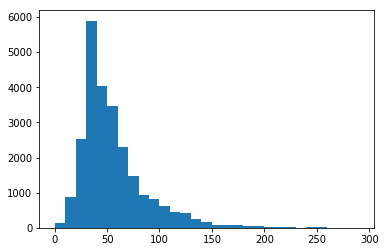

In [122]:
plt.hist(df['chars_in_subject'], bins = list(np.arange(0, 300, 10)))
df['chars_in_subject_binned'] = np.searchsorted(list(np.arange(0, 300, 10)), df['chars_in_subject'].values)

60769114


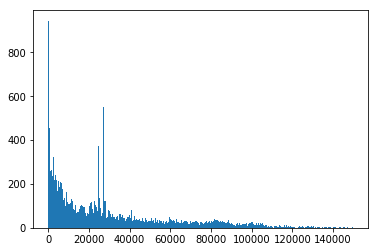

In [138]:
plt.hist(df['chars_in_body'], bins = list(np.arange(0, 150000, 300))) # put this into action?
print(max(df['chars_in_body']))

In [123]:
df.head()

,Unnamed: 0,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label,date_time,final_date,time,weekday,chars_in_subject_binned
0,0,"Sun, 28 Aug 2016 00:17:44 +0000",amazon,in,0,0,multipart/mixed,0,0,0,0,102,4,3,2016-08-28 00:17:44+00:00,2016-08-28,00:17:44,6,11
1,1,"Mon, 13 Jun 2016 07:17:24 +0000 (UTC)",linkedin,com,0,0,multipart/alternative,15,44,0,0,55,35444,1,2016-06-13 07:17:24+00:00,2016-06-13,07:17:24,0,6
2,2,"Tue, 21 Nov 2017 05:03:34 -0800 (PST)",quora,com,0,0,multipart/alternative,12,110,1,1,59,100770,1,2017-11-21 05:03:34-08:00,2017-11-21,05:03:34,1,6
3,3,"Wed, 3 Aug 2016 12:22:52 +0530",iiitd,ac.in,0,0,multipart/alternative,0,0,0,0,8,117,2,2016-08-03 12:22:52+05:30,2016-08-03,12:22:52,2,1
4,4,"Thu, 14 Feb 2019 09:37:30 +0000",mail,paypal.com,0,0,multipart/alternative,5,49,1,0,42,36472,3,2019-02-14 09:37:30+00:00,2019-02-14,09:37:30,3,5


([<matplotlib.patches.Wedge at 0x7fe762fb3208>,
  ...],
 [Text(1.1,0,''),
  Text(1.1,0,''),
  Text(1.1,0,''),
  Text(1.1,0,''),
  Text(1.1,0,''),
  Text(1.1,0,''),
  Text(1.1,0.000991512,''),
  Text(1.1,0.00198302,''),
  Text(1.1,0.00198302,''),
  Text(1.1,0.00198302,''),
  Text(1.1,0.00198302,''),
  Text(1.1,0.00231353,''),
  Text(1.1,0.00264403,''),
  Text(1.1,0.00264403,''),
  Text(1.1,0.00264403,''),
  Text(1.1,0.00264403,''),
  Text(1.1,0.00264403,''),
  Text(1.1,0.00264403,''),
  Text(1.1,0.00264403,''),
  Text(1.1,0.00264403,''),
  Text(1.1,0.00264403,''),
  Text(1.1,0.00264403,''),
  Text(1.1,0.00264403,''),
  Text(1.1,0.00264403,''),
  Text(1.1,0.00264403,''),
  Text(1.1,0.00264403,''),
  Text(1.1,0.00330504,''),
  Text(1.09999,0.00396604,''),
  Text(1.09999,0.00396604,''),
  Text(1.09999,0.00396604,''),
  Text(1.09999,0.00396604,''),
  Text(1.09999,0.00462705,''),
  Text(1.09999,0.00528805,''),
  Text(1.09999,0.00528805,''),
  Text(1.09998,0.00627955,''),
  Text(1.09998,0.007

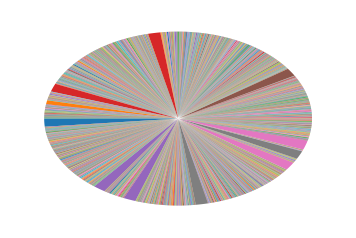

In [147]:
plt.pie(df['ccs'])  